<a href="https://colab.research.google.com/github/jayantkp/Malaria-Detection-in-Blood-Cells-using-ML/blob/main/malaria_detection_in_cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [ ]:
import numpy as np
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras

Loading the dataset

In [ ]:
img_dir = "/content/drive/MyDrive/Malaria_detection/cell_images/cell_images"
classes = os.listdir(img_dir)
print(classes)

['Uninfected', 'Parasitized']


Generating the training and validation dataset from the image files

In [ ]:
size = 64
batch_size = 16
training_data = keras.preprocessing.image_dataset_from_directory(img_dir,
                                                                seed = 45,
                                                                validation_split = 0.2,
                                                                subset = "training",
                                                                image_size = (size,size),
                                                                batch_size = batch_size)

validation_data = keras.preprocessing.image_dataset_from_directory(img_dir,
                                                                seed = 45,
                                                                validation_split = 0.2,
                                                                subset = "validation",
                                                                image_size = (size,size),
                                                                batch_size = batch_size)

Found 1026 files belonging to 2 classes.
Using 821 files for training.
Found 1026 files belonging to 2 classes.
Using 205 files for validation.


Plotting the images

Image shape: (154, 124, 3)


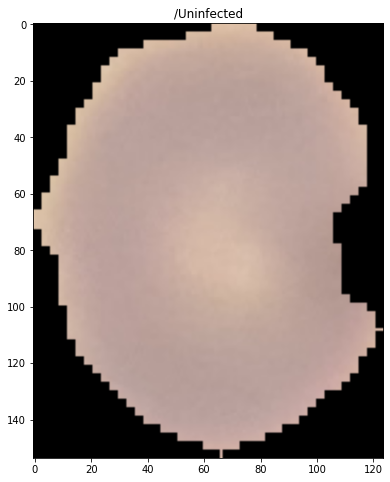

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize = (12,8))
def view_images(target_dir, target_class):
    target_folder = target_dir + target_class
    
    random_image = random.sample(os.listdir(target_folder), 1)
    
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    
    print(f"Image shape: {img.shape}")
    return img
uninfected_images = view_images("/content/drive/MyDrive/Malaria_detection/cell_images/cell_images",'/Uninfected')

Image shape: (130, 127, 3)


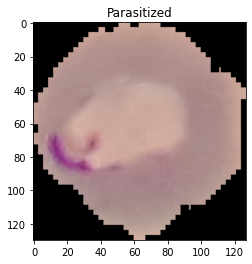

In [ ]:
parasitized_images = view_images('/content/drive/MyDrive/Malaria_detection/cell_images/cell_images/', 'Parasitized')

In [ ]:
from tensorflow.keras.layers import Flatten, Conv2D, Dropout, BatchNormalization, MaxPool2D, Dense

Creating the CNN architecture

In [ ]:
input = keras.layers.Input(shape = (64,64,3))
data_aug = keras.layers.experimental.preprocessing.Rescaling(1./255)(input)
conv1 = Conv2D(32, kernel_size = 3, activation = "relu")(data_aug)
pool1 = MaxPool2D(2)(conv1)
norm1 = BatchNormalization(axis = -1)(pool1)
drop1 = Dropout(0.2)(norm1)

conv2 = Conv2D(32, kernel_size = 3, activation = "relu")(drop1)
pool2 = MaxPool2D(2)(conv2)
norm2 = BatchNormalization(axis = -1)(pool2)
drop2 = Dropout(0.2)(norm2)

flatten = Flatten()(drop2)

hidden1 = Dense(512, activation = "relu")(flatten)
norm3 = BatchNormalization(axis = -1)(hidden1)
drop3 = Dropout(0.2)(norm3)

hidden2 = Dense(512, activation = "relu")(drop3)
norm4 = BatchNormalization(axis = -1)(hidden2)
drop4 = Dropout(0.2)(norm4)

output = Dense(2, activation = "sigmoid")(drop4)

model = keras.Model(inputs = input, outputs = output)

In [ ]:
model.compile(optimizer = "Adam",
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 31, 31, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0     

In [ ]:
%%time
history = model.fit(training_data, epochs = 20, validation_data = validation_data, verbose = True)

Epoch 1/20
52/52 [==============================] - 57s 744ms/step - loss: 0.8931 - accuracy: 0.6833 - val_loss: 0.8714 - val_accuracy: 0.5024
Epoch 2/20
52/52 [==============================] - 3s 45ms/step - loss: 0.5689 - accuracy: 0.7747 - val_loss: 0.6273 - val_accuracy: 0.7122
Epoch 3/20
52/52 [==============================] - 3s 45ms/step - loss: 0.4614 - accuracy: 0.8027 - val_loss: 2.2260 - val_accuracy: 0.4732
Epoch 4/20
52/52 [==============================] - 3s 45ms/step - loss: 0.4488 - accuracy: 0.8258 - val_loss: 2.1802 - val_accuracy: 0.4732
Epoch 5/20
52/52 [==============================] - 3s 45ms/step - loss: 0.3420 - accuracy: 0.8599 - val_loss: 0.5670 - val_accuracy: 0.7073
Epoch 6/20
52/52 [==============================] - 3s 46ms/step - loss: 0.3166 - accuracy: 0.8709 - val_loss: 1.6177 - val_accuracy: 0.4732
Epoch 7/20
52/52 [==============================] - 3s 47ms/step - loss: 0.2129 - accuracy: 0.9111 - val_loss: 2.1639 - val_accuracy: 0.4732
Epoch 8/20


Plotting the loss and the accuracy of our trained model

In [ ]:
def plot_loss(history):

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # plot loss
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.title('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.title('Accuracy')
    plt.legend()

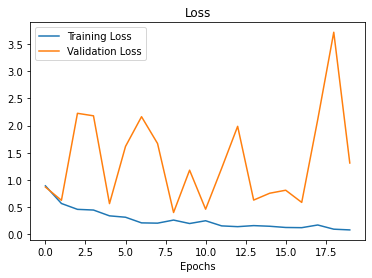

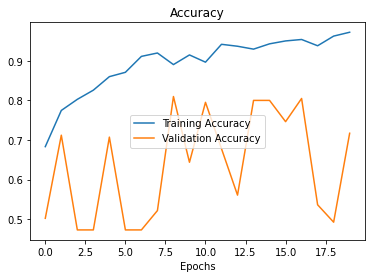

In [ ]:
plot_loss(history)

Evaluating the model on validation data

In [ ]:
model.evaluate(validation_data)

13/13 [==============================] - 0s 16ms/step - loss: 1.3129 - accuracy: 0.7171


[1.3129087686538696, 0.7170731425285339]

Saving the model to a HDF5 file

In [ ]:
tf.keras.models.save_model(model,'my_model.hdf5')

In [ ]:
!pip install -q streamlit

Deploying the streamlit app using localtunnel

In [ ]:
!streamlit run /content/drive/MyDrive/Malaria_detection/app.py &npx localtunnel --port 8501


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.135.75.158:8501

npx: installed 22 in 3.546s
your url is: https://tame-rat-54.loca.lt
2021-12-09 13:33:26.912653: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2021-12-09 13:35:22.730 5 out of the last 5 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f07f020e290> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. F